In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [8]:
import splitfolders

In [17]:
splitfolders.ratio('/Users/bernayilmaz/Desktop/potato_disease/PlantVillage', output='/Users/bernayilmaz/Desktop/potato_disease/PlantVillage/Dataset',
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 2152 files [00:00, 3940.61 files/s]


In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [19]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [20]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [21]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.60726994 0.5327601  0.5406033 ]
  [0.6060595  0.5315497  0.5393928 ]
  [0.6201036  0.5455938  0.55343693]
  ...
  [0.69388497 0.6311399  0.63506144]
  [0.6901267  0.6273816  0.63128006]
  [0.6884764  0.6257313  0.6290796 ]]

 [[0.60782003 0.53331023 0.5411534 ]
  [0.6039372  0.5294274  0.53727055]
  [0.6193902  0.5448804  0.5527235 ]
  ...
  [0.6801287  0.61738354 0.61794937]
  [0.6784783  0.6157332  0.6157489 ]
  [0.6821727  0.61942756 0.61942756]]

 [[0.61153203 0.53702223 0.54486537]
  [0.60448736 0.52997756 0.5378207 ]
  [0.61718976 0.54267997 0.5505231 ]
  ...
  [0.7016507  0.6389056  0.6389056 ]
  [0.70550144 0.64275634 0.64275634]
  [0.7053867  0.6431373  0.6416502 ]]

 ...

 [[0.36240336 0.26436412 0.27612883]
  [0.35097864 0.25293943 0.26470414]
  [0.37078264 0.27274343 0.28450814]
  ...
  [0.4947222  0.40060455 0.40060455]
  [0.5195378  0.4254202  0.4254202 ]
  [0.6417891  0.54767144 0.54767144]]

 [[0.47095522 0.372916   0.38468072]
  [0.49032122 0.392282   0.4040467 ]


In [22]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [23]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [24]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7402875  0.73244435 0.7873463 ]
  [0.7590756  0.75123245 0.8061344 ]
  [0.79111016 0.783267   0.838169  ]
  ...
  [0.7465523  0.7426307  0.7975327 ]
  [0.7484132  0.74449164 0.7993936 ]
  [0.7502742  0.7463526  0.8012546 ]]

 [[0.7396672  0.73182404 0.786726  ]
  [0.7553537  0.74751055 0.8024125 ]
  [0.7855273  0.77768415 0.8325861 ]
  ...
  [0.7477136  0.74379206 0.798694  ]
  [0.74585265 0.7419311  0.79683304]
  [0.7439917  0.7400701  0.79497206]]

 [[0.7390469  0.73120373 0.7861057 ]
  [0.7516318  0.74378866 0.7986906 ]
  [0.7799444  0.7721013  0.82700324]
  ...
  [0.73609704 0.73217547 0.7870774 ]
  [0.73423606 0.7303145  0.78521645]
  [0.73237514 0.7284536  0.78335553]]

 ...

 [[0.5261537  0.51831055 0.5732125 ]
  [0.49947998 0.49163684 0.54653883]
  [0.4728063  0.46496317 0.5198651 ]
  ...
  [0.6673769  0.6516906  0.7105141 ]
  [0.657954   0.6422677  0.70109123]
  [0.6304626  0.6147763  0.67359984]]

 [[0.4375357  0.42969257 0.48459452]
  [0.4623484  0.45450526 0.5094072 ]


In [25]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
1506/32

47.0625

In [29]:
215/32

6.71875

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 26s 531ms/step - loss: 0.9191 - accuracy: 0.4776 - val_loss: 0.8813 - val_accuracy: 0.5365
Epoch 2/20
47/47 [==============================] - 25s 531ms/step - loss: 0.8211 - accuracy: 0.5785 - val_loss: 0.7299 - val_accuracy: 0.6354
Epoch 3/20
47/47 [==============================] - 25s 527ms/step - loss: 0.5675 - accuracy: 0.7589 - val_loss: 0.4278 - val_accuracy: 0.8281
Epoch 4/20
47/47 [==============================] - 25s 522ms/step - loss: 0.4265 - accuracy: 0.8163 - val_loss: 0.3775 - val_accuracy: 0.8333
Epoch 5/20
47/47 [==============================] - 25s 527ms/step - loss: 0.2942 - accuracy: 0.8884 - val_loss: 0.3363 - val_accuracy: 0.8646
Epoch 6/20
47/47 [==============================] - 25s 533ms/step - loss: 0.2565 - accuracy: 0.8971 - val_loss: 0.3317 - val_accuracy: 0.8906
Epoch 7/20
47/47 [==============================] - 25s 533ms/step - loss: 0.2029 - accuracy: 0.9165 - val_loss: 0.3535 - val_accuracy: 0.8750

In [31]:
scores = model.evaluate(test_generator)
scores

7/7 [==============================] - 2s 241ms/step - loss: 0.0492 - accuracy: 0.9815


[0.049200840294361115, 0.9814814925193787]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
type(history.history['loss'])

list

In [36]:
len(history.history['loss'])

20

In [37]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9191274642944336,
 0.8211443424224854,
 0.5674578547477722,
 0.42645639181137085,
 0.29421696066856384]

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [39]:
val_acc

[0.5364583134651184,
 0.6354166865348816,
 0.828125,
 0.8333333134651184,
 0.8645833134651184,
 0.890625,
 0.875,
 0.9010416865348816,
 0.875,
 0.9479166865348816,
 0.9583333134651184,
 0.9479166865348816,
 0.921875,
 0.96875,
 0.9583333134651184,
 0.9427083134651184,
 0.9166666865348816,
 0.9270833134651184,
 0.9739583134651184,
 0.9635416865348816]

In [40]:
acc

[0.4776219129562378,
 0.5784903168678284,
 0.7588510513305664,
 0.8162992596626282,
 0.8884435296058655,
 0.8971275687217712,
 0.916499674320221,
 0.9445557594299316,
 0.9398797750473022,
 0.9465597867965698,
 0.948563814163208,
 0.9759519100189209,
 0.9559118151664734,
 0.9746158719062805,
 0.9859719276428223,
 0.9592518210411072,
 0.9779559373855591,
 0.9780585169792175,
 0.9873079657554626,
 0.9732798933982849]

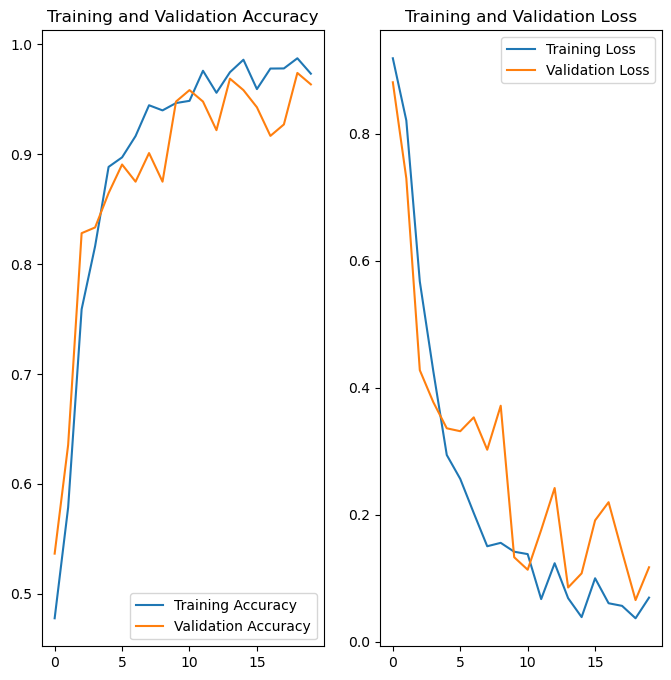

In [41]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 172ms/step
predicted label: Potato___Late_blight


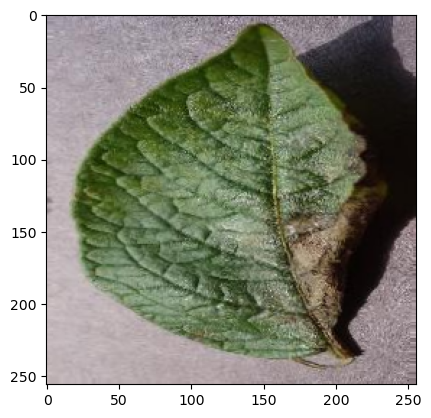

In [44]:
# Run prediction on a sample image
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


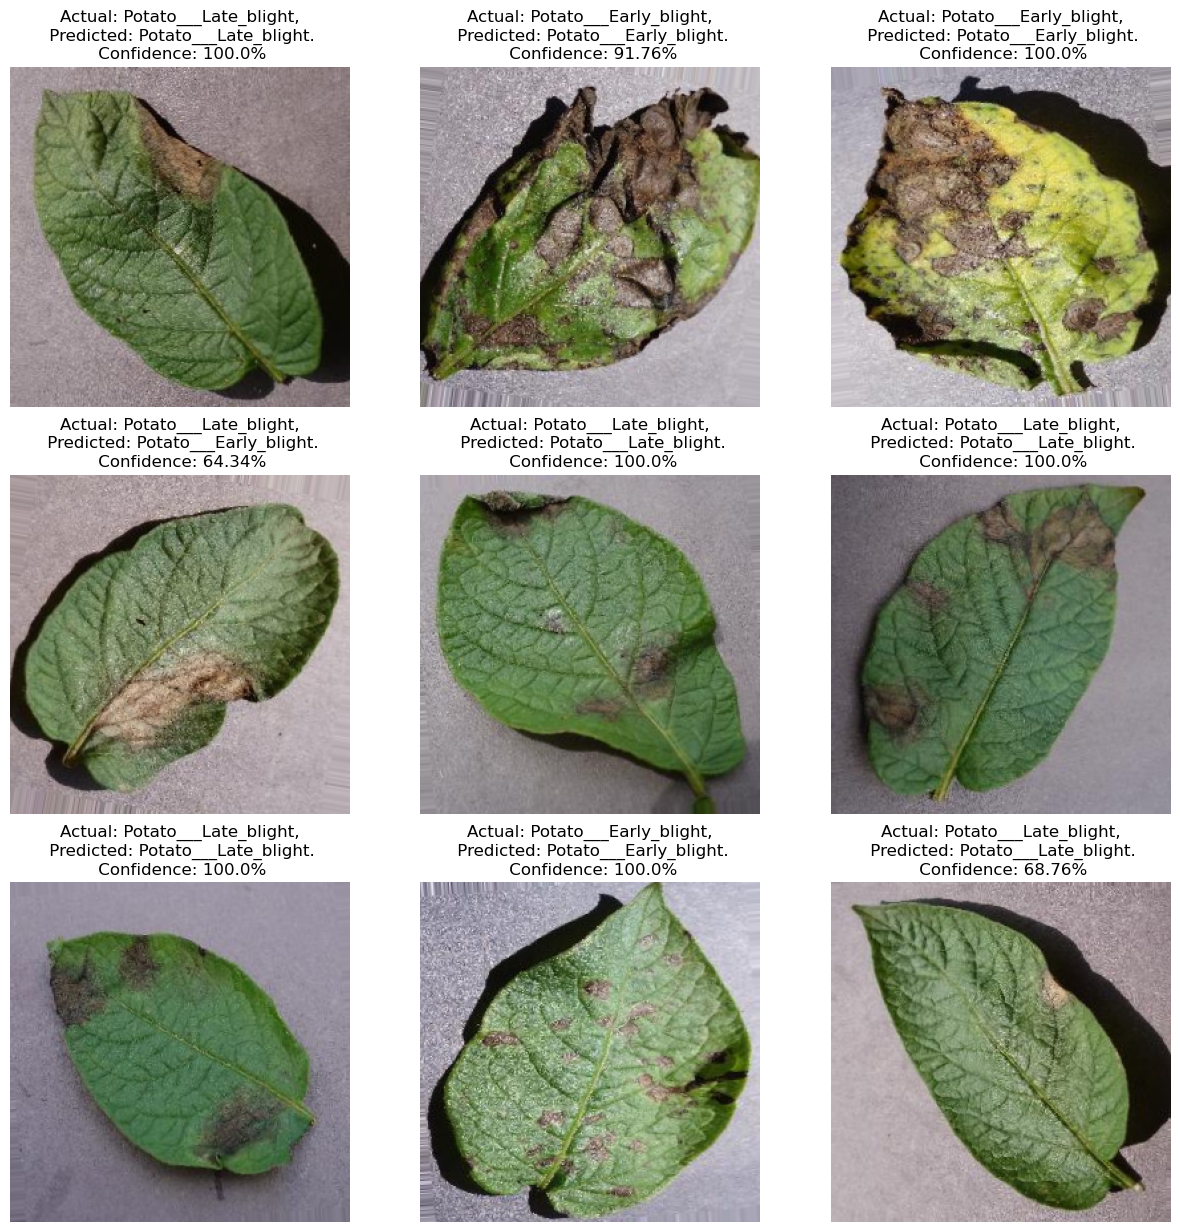

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [47]:
model.save("/Users/bernayilmaz/Desktop/potato_disease/saved_models/potatoes.h5")

/Users/bernayilmaz/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
